Import basic libraries:

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind,chi2_contingency


Load the students performance dataset

In [52]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Check for nullvalues in dataset : To clean the dataset

In [53]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

To check student score with respect to gender : Plot bar chart

<Axes: xlabel='gender', ylabel='math score'>

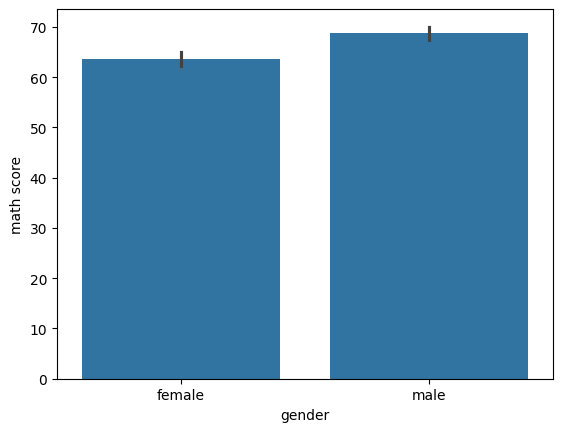

In [54]:
sns.barplot(data=df,x=df['gender'],y=df['math score'])

<Axes: xlabel='gender', ylabel='reading score'>

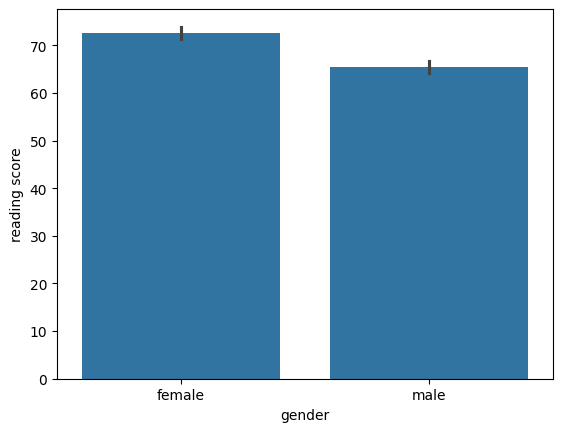

In [55]:
sns.barplot(data=df,y=df['reading score'],x=df['gender'])

<Axes: xlabel='gender', ylabel='writing score'>

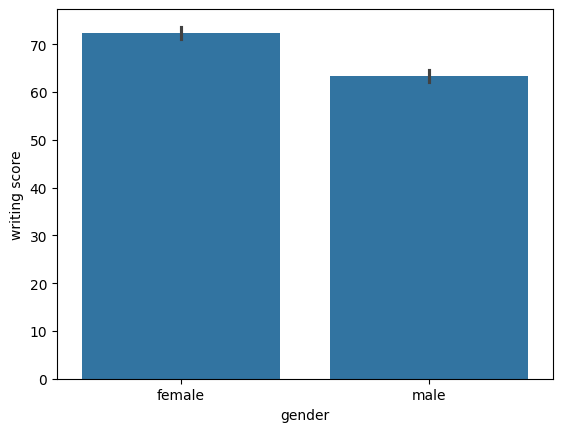

In [56]:
sns.barplot(data=df,x=df['gender'],y=df['writing score'])

To check outliers ploting scores : Since its marks, there wont be outlier as such

C:\Users\sujin\AppData\Local\Temp\ipykernel_4156\1069921636.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data,labels=['writing','reading','maths'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1e665550190>,
 'caps': [<matplotlib.lines.Line2D at 0x1e665550410>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e665550050>,
 'medians': [<matplotlib.lines.Line2D at 0x1e665550690>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e6655507d0>,
 'means': []}

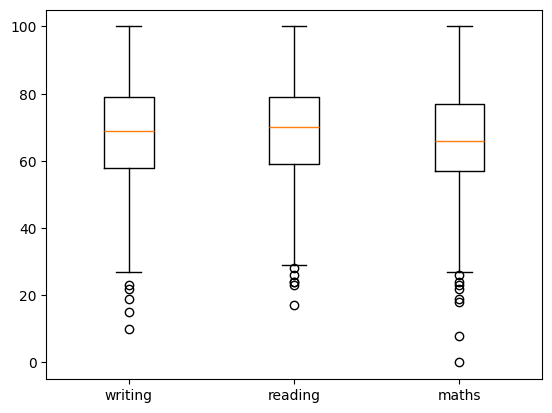

In [57]:
data = [df['writing score'],df['reading score'],df['math score']]
plt.boxplot(data,labels=['writing','reading','maths'])

In [58]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [59]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [60]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [61]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [62]:
df.groupby('race/ethnicity')['math score'].agg(minimum = 'min', max = 'max',avg ='mean')

,minimum,max,avg
race/ethnicity,,,
group A,28,100,61.629213
group B,8,97,63.452632
group C,0,98,64.463950
group D,26,100,67.362595
group E,30,100,73.821429


Grouped parents education level to check is there any pattern with respect to mathscore


In [63]:
df.groupby('parental level of education')['math score'].agg(minimum = 'min', max = 'max',avg ='mean')

,minimum,max,avg
parental level of education,,,
associate's degree,26,100,67.882883
bachelor's degree,29,100,69.389831
high school,8,99,62.137755
master's degree,40,95,69.745763
some college,19,100,67.128319
some high school,0,97,63.497207


In [64]:
# IQR Method
for column in ['math score', 'reading score', 'writing score']:
    Q1 = df[column].quantile(0.05)#25% has some outliers, but mark can be in that range 
    Q3 = df[column].quantile(0.95)#75% has some outliers, but can be in that range 
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f'{column} has {len(outliers)} outliers')

math score has 0 outliers
reading score has 0 outliers
writing score has 0 outliers


Is gender and math score is depended in any ways?
Calculate using independent ttest:
Null hypothesis:There is no difference in avg scores of males and females

In [66]:
female_math_score= df[df['gender']=='female']['math score']
male_mathsscore = df[df['gender']=='male']['math score']
t_stat_math,p_valmath = ttest_ind(female_math_score,male_mathsscore)
t_stat_math,p_valmath

(np.float64(-5.383245869828983), np.float64(9.120185549328822e-08))

In [67]:
if p_valmath< 0.05:
    print("Reject Null hypothesis , there is differance in scores in male and female student")
else:
    print("Fail to reject null hypothesis,there is no difference")

Reject Null hypothesis , there is differance in scores in male and female student


In [68]:
#Rejected null hypothesis and concluded that there is difference in scores in male and female students

Test if lunch type is associated with test prep course.
Null hypothesis: No association between lunch type and test preparation

In [69]:
contingency_table = pd.crosstab(df['lunch'], df['test preparation course'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square: {chi2:.2f}, p-value: {p:.4f}")

Chi-square: 0.22, p-value: 0.6383


In [70]:
if p < 0.05:
    print("Reject null hypothesis, there is association between lunch type and test prep")
else:
    print("Fail to reject null hypothesis, there is no association")

Fail to reject null hypothesis, there is no association


Encode categorical variable : Before giving to any algorithm(model), all values in dataframe should be numeric


In [71]:
df_encoded = pd.get_dummies(df, 
                            columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], 
                             drop_first=True,dtype='int')
df_encoded

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,1,0,1,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,0,0,0,0,1,0,0,1,0,0,1,0
996,62,55,55,1,0,1,0,0,0,1,0,0,0,0,1
997,59,71,65,0,0,1,0,0,0,1,0,0,0,0,0
998,68,78,77,0,0,0,1,0,0,0,0,1,0,1,0


Inorder to reduce the dimesion(by preserving as much as information) and visualize data in 3D or less:
Perform PCA

In [72]:
#step1 : Standardization
df_scaled = (df_encoded - df_encoded.mean())/df_encoded.std()
df_scaled = df_scaled.drop('math score',axis=1)


In [73]:
"""from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)
X_scaled"""

'from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(df_encoded)\nX_scaled'

In [74]:
#X_scaled[0]

In [75]:
#Step 2: Calculate the Covariance Matrix
cov_matrix = df_scaled.cov()
cov_matrix

,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
reading score,1.000000,0.954598,-0.244313,-0.060283,-0.003074,0.035177,0.106712,0.096024,-0.151068,0.106452,0.010782,-0.071369,0.229560,-0.241780
writing score,0.954598,1.000000,-0.301225,-0.078254,-0.010203,0.082032,0.089077,0.128297,-0.182211,0.125693,0.027989,-0.097326,0.245769,-0.312946
gender_male,-0.244313,-0.301225,1.000000,-0.028466,-0.063368,0.030566,0.020302,-0.011638,0.037952,-0.046188,-0.004460,0.008990,0.021372,-0.006028
race/ethnicity_group B,-0.060283,-0.078254,-0.028466,1.000000,-0.331479,-0.288574,-0.195411,-0.019121,0.069093,-0.056363,-0.036203,0.026531,-0.008257,0.000106
race/ethnicity_group C,-0.003074,-0.010203,-0.063368,-0.331479,1.000000,-0.407797,-0.276145,0.015682,0.007977,0.001630,-0.015872,-0.045339,-0.003385,-0.012522
race/ethnicity_group D,0.035177,0.082032,0.030566,-0.288574,-0.407797,1.000000,-0.240402,-0.020556,-0.042118,0.072793,0.042347,0.018402,-0.009458,0.055956
race/ethnicity_group E,0.106712,0.089077,0.020302,-0.195411,-0.276145,-0.240402,1.000000,0.013221,-0.039494,-0.003180,0.023153,-0.053075,0.052398,-0.059393
parental level of education_bachelor's degree,0.096024,0.128297,-0.011638,-0.019121,0.015682,-0.020556,0.013221,1.000000,-0.180595,-0.091588,-0.197647,-0.170790,-0.013668,-0.024285
parental level of education_high school,-0.151068,-0.182211,0.037952,0.069093,0.007977,-0.042118,-0.039494,-0.180595,1.000000,-0.123632,-0.266799,-0.230545,-0.002211,0.074446
parental level of education_master's degree,0.106452,0.125693,-0.046188,-0.056363,0.001630,0.072793,-0.003180,-0.091588,-0.123632,1.000000,-0.135305,-0.116919,-0.027095,0.009933


In [76]:
#Step 3: Compute Eigenvalues and Eigenvectors
eigh_values , eigh_vector = np.linalg.eigh(cov_matrix)
eigh_values,eigh_vector

(array([0.03578704, 0.11571675, 0.26725617, 0.60957409, 0.93970223,
        0.97913127, 1.0619883 , 1.12005129, 1.17572937, 1.23212714,
        1.27208141, 1.34290275, 1.4484704 , 2.39948179]),
 array([[ 6.72600232e-01,  3.74808325e-02,  3.90227576e-02,
          4.07249273e-01,  3.64688413e-03,  2.44582008e-02,
         -5.49093390e-02,  6.33806155e-02, -5.22141427e-02,
         -8.24527600e-02, -4.15833820e-03,  6.99861352e-02,
          1.90191199e-02, -5.96978957e-01],
        [-7.30611332e-01, -7.80093861e-03,  1.68988474e-02,
          2.50108443e-01,  1.30040291e-03,  5.69359156e-02,
         -5.20750425e-02,  2.97727071e-02, -6.19937942e-02,
         -8.40007697e-02, -1.83826034e-02,  4.71391920e-02,
          2.74535431e-03, -6.18868232e-01],
        [-5.76752976e-02, -1.89861720e-02,  1.71549163e-02,
          4.73248275e-01,  6.85273602e-01,  1.46747920e-01,
         -2.37497144e-01,  6.85207445e-02,  3.36863718e-01,
          1.46380994e-01,  9.15797565e-02, -2.70908669e-02

In [77]:
#sort eighen values to get maximum variance
sorted_index = np.argsort(eigh_values)[::-1]  # Indices for sorting in descending order
eigen_values = eigh_values[sorted_index]
eigen_vectors = eigh_vector[:, sorted_index]

In [78]:
eigen_values,eigen_vectors

(array([2.39948179, 1.4484704 , 1.34290275, 1.27208141, 1.23212714,
        1.17572937, 1.12005129, 1.0619883 , 0.97913127, 0.93970223,
        0.60957409, 0.26725617, 0.11571675, 0.03578704]),
 array([[-5.96978957e-01,  1.90191199e-02,  6.99861352e-02,
         -4.15833820e-03, -8.24527600e-02, -5.22141427e-02,
          6.33806155e-02, -5.49093390e-02,  2.44582008e-02,
          3.64688413e-03,  4.07249273e-01,  3.90227576e-02,
          3.74808325e-02,  6.72600232e-01],
        [-6.18868232e-01,  2.74535431e-03,  4.71391920e-02,
         -1.83826034e-02, -8.40007697e-02, -6.19937942e-02,
          2.97727071e-02, -5.20750425e-02,  5.69359156e-02,
          1.30040291e-03,  2.50108443e-01,  1.68988474e-02,
         -7.80093861e-03, -7.30611332e-01],
        [ 2.39275134e-01, -1.36169381e-01, -2.70908669e-02,
          9.15797565e-02,  1.46380994e-01,  3.36863718e-01,
          6.85207445e-02, -2.37497144e-01,  1.46747920e-01,
          6.85273602e-01,  4.73248275e-01,  1.71549163e-02

In [79]:
#Step 5: Select Top k Components
eigenvector_subset = eigen_vectors[:, 0:2]
eigenvector_subset

array([[-0.59697896,  0.01901912],
       [-0.61886823,  0.00274535],
       [ 0.23927513, -0.13616938],
       [ 0.1003274 , -0.02618901],
       [ 0.00414157,  0.68850962],
       [-0.04754512, -0.64308029],
       [-0.11587561, -0.06467886],
       [-0.12365111,  0.12515273],
       [ 0.19842266,  0.16173383],
       [-0.12039438, -0.07530077],
       [-0.04178496, -0.15485657],
       [ 0.06605485, -0.10898523],
       [-0.20084216, -0.00227347],
       [ 0.24898285, -0.07257344]])

In [80]:
df_scaled.shape


(1000, 14)

In [81]:
eigenvector_subset.shape

(14, 2)

In [82]:
X_reduced = np.dot(df_scaled, eigenvector_subset)
X_reduced

array([[-0.68638417,  0.37973776],
       [-2.47513413,  1.34239121],
       [-2.52823309, -0.29403416],
       ...,
       [ 0.25742204,  2.0955258 ],
       [-1.65343228, -1.61343206],
       [-1.4084778 , -1.74794039]], shape=(1000, 2))

In [83]:
reduced_df = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
print(reduced_df)

          PC1       PC2
0   -0.686384  0.379738
1   -2.475134  1.342391
2   -2.528233 -0.294034
3    2.174355 -0.233875
4   -0.457315  0.900727
..        ...       ...
995 -3.881725 -0.256742
996  2.316615  1.649193
997  0.257422  2.095526
998 -1.653432 -1.613432
999 -1.408478 -1.747940

[1000 rows x 2 columns]


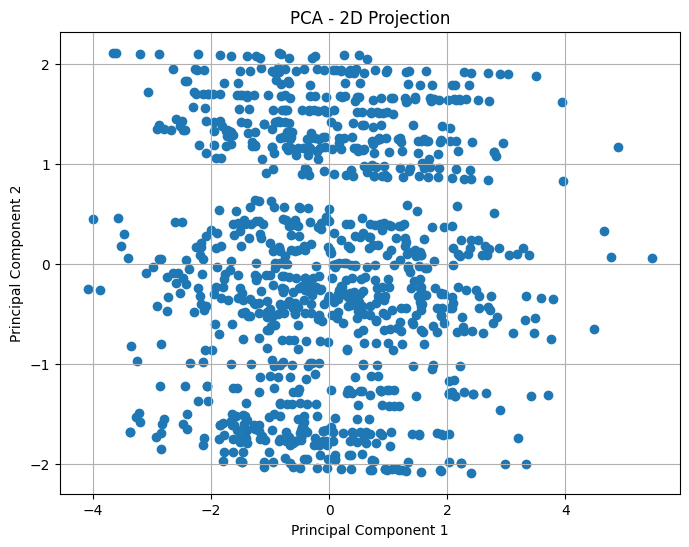

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['PC1'],reduced_df['PC2'])
plt.title('PCA - 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [85]:
explained_variance_ratio = eigen_values / np.sum(eigen_values)
explained_variance_ratio

array([0.17139156, 0.10346217, 0.09592163, 0.09086296, 0.08800908,
       0.08398067, 0.08000366, 0.07585631, 0.06993795, 0.06712159,
       0.04354101, 0.01908973, 0.00826548, 0.00255622])

In [86]:
print("Explained Variance Ratio:")
for i, var in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {var:.4f}")

Explained Variance Ratio:
PC1: 0.1714
PC2: 0.1035
PC3: 0.0959
PC4: 0.0909
PC5: 0.0880
PC6: 0.0840
PC7: 0.0800
PC8: 0.0759
PC9: 0.0699
PC10: 0.0671
PC11: 0.0435
PC12: 0.0191
PC13: 0.0083
PC14: 0.0026


In [87]:
cum_var = np.cumsum(explained_variance_ratio)
# Example: Keep enough PCs to explain 90%
n_components = np.argmax(cum_var >= 0.90) + 1
n_components

np.int64(10)

So we need 10 PCA components to get maximum informations(90%) from the dataset

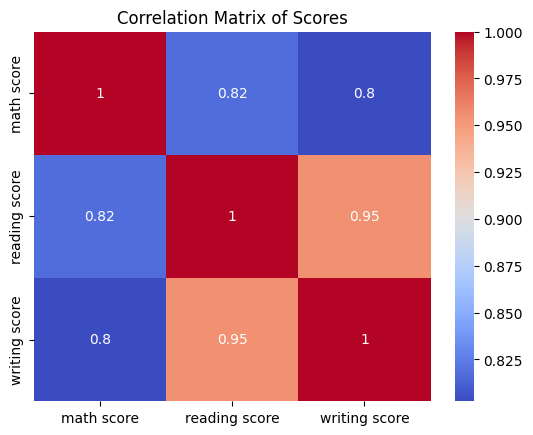

In [96]:
# Compute correlation matrix for numerical columns only
corr_matrix = df[['math score', 'reading score', 'writing score']].corr()
# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Scores")
plt.show()

To predict the math score of high school students based on their demographic features, parental education level, test preparation course, and performance in reading and writing.(Using Linear regression)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr = LinearRegression() 
X = df_scaled.drop("math score", axis=1)
Y = df_scaled["math score"]
x_train,x_test,y_train,y_test =train_test_split(X,Y,random_state=42,test_size=0.2)


In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)
y_pred

array([ 6.79213566e-01, -4.75037388e-01,  7.18934725e-01,  7.09803313e-01,
        1.42044875e+00,  8.52400945e-01, -9.45976242e-02, -8.62692874e-01,
        5.33909344e-01, -1.11293100e+00, -8.66667553e-01, -1.94023481e+00,
        1.20353219e-01, -9.10879869e-01,  1.36050745e+00,  2.92928747e-01,
       -9.32095163e-01, -1.27002966e+00, -1.13863733e+00, -8.81239472e-01,
        5.14198289e-01, -1.79402049e+00, -5.74306522e-01, -1.96270168e+00,
        7.95358839e-01,  1.03613188e+00,  6.13064156e-01, -1.31704912e+00,
       -2.31173590e+00, -1.06759644e+00, -6.91868784e-03,  2.85078307e-01,
       -3.68186645e-01,  1.16406839e+00,  1.20970472e+00, -1.32007109e+00,
        6.60311213e-01,  2.71512657e-01, -1.52461749e-02, -4.11045372e+00,
        8.18364567e-01,  7.67598344e-02,  1.24167384e-01, -3.83536245e-01,
        8.95916308e-01,  9.96535914e-02,  4.06044933e-01, -2.72563307e+00,
        1.31020950e+00,  2.63760847e-01,  6.14894070e-01,  4.68008907e-02,
        9.94258535e-01, -

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.8804332983749565


Conclusion : 88% of the variation in mathsscore in students is explained by our input features

No 2D or 3D plots for this linear regression, since we use all features to predict maths score:



Plotting predicted vs actual mathscore

<Axes: xlabel='math score'>

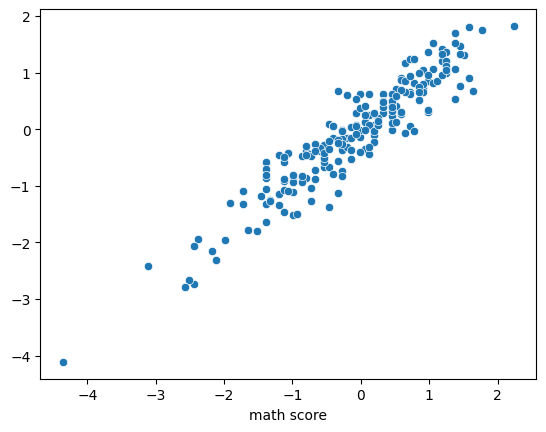

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)

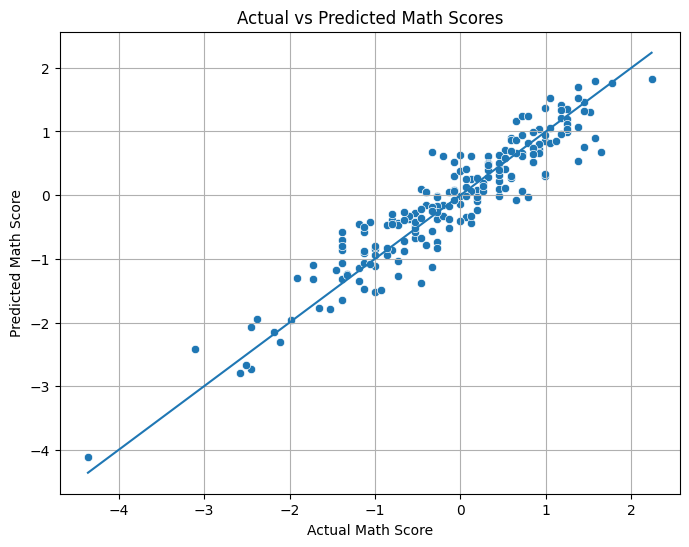

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])  # Diagonal line gives the actual math score
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual vs Predicted Math Scores')
plt.grid(True)
plt.show()

By finding the coefficients, its known that which feature gives more weightage to the predicted score

In [ ]:
feature_names = X.columns
coefficients = lr.coef_
# Get coefficients from trained model : It gives the weightage.
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})
# Sort by absolute influence : features impact the target the most, regardless of direction(positive/negative)
coef_df["AbsCoefficient"] = np.abs(coef_df["Coefficient"])
coef_df_sorted = coef_df.sort_values(by="AbsCoefficient", ascending=False)

# Display top influences
print(coef_df_sorted[["Feature", "Coefficient"]].head(10))

                                        Feature  Coefficient
1                                 writing score     0.725704
2                                   gender_male     0.430749
0                                 reading score     0.227261
6                        race/ethnicity_group E     0.112018
12                               lunch_standard     0.110826
13                 test preparation course_none     0.104061
10     parental level of education_some college     0.027565
8       parental level of education_high school     0.024342
9   parental level of education_master's degree    -0.021774
4                        race/ethnicity_group C    -0.019240


Conclusion : writing score gives 75% weightage to the math score prediction. By R2 score, 88% of the variation in mathsscore in students is explained by our input features